# メトロポリス・ヘイスティングス法

In [76]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import choice
from scipy import integrate

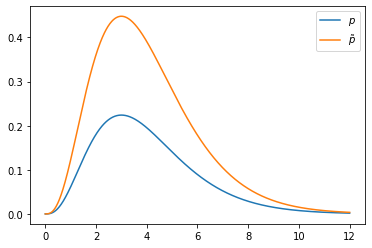

In [77]:
# [0,12]の1000個のデータ
range_min,range_max=0,12
n_samples=1000
x=np.linspace(range_min, range_max,n_samples)

norm=stats.norm(loc=0, scale=1)
gamma=stats.gamma(a=4)
# 正規化定数,
Z_p=2
# p(z),gauss
def childa_p(z):
    return gamma.pdf(z)*Z_p
    # return norm.pdf(z)*Z_p

# p(z),正規化された値，サンプリングできない，特定の範囲では厳密には確率分布ではない
p_data=childa_p(x)/Z_p
plt.plot(x,p_data,label='$p$')

# サンプリング可能な~p(z)
childa_p_data=childa_p(x)
plt.plot(x,childa_p_data,label='$\~p$')

# q(z),一様分布
# q_data = np.linspace(0.1, 0.1, 1000)
# plt.plot(x,q_data,label='$q$')

plt.legend()
plt.show()

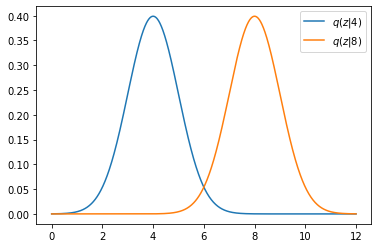

In [78]:
def q(z,zc):
    # zc状態のもとでの分布q(z|zc),平均zcのガウス分布
    return stats.norm(loc=zc, scale=1).pdf(z)

plt.plot(x,q(x,4),label='$q(z|4)$')
plt.plot(x,q(x,8),label='$q(z|8)$')
plt.legend()

In [79]:
def sampling_q(previous):
    # q(x|previous)分布に従い[-4,4]の乱数生成
    while True:
        z=stats.norm(loc=previous, scale=1).rvs()
        if range_min<=z<=range_max:
            # 範囲外なら再サンプリング
            return z
    # while True:
    #     # 一様に生成した[-4,4]の乱数zをq(z|previous)の確率で取得
    #     z=np.random.uniform(-4, 4)
    #     if q(z,previous)>=np.random.uniform(0, 1):
    #         return z
sampling_q(0)

0.4931312117460252

In [80]:
def sampling(previous):
    '''
    メトロポリス・ヘイスティングス法
    qが左右対象のため,正確にはメトロポリス法
    :param previous:
    :return: candidate 
    '''
    while True:
        # previousを平均としたガウス分布qからサンプル取得
        candidate=sampling_q(previous)
        # 比率r
        r=(childa_p(candidate)/childa_p(previous))*(q(previous,candidate)/q(candidate,previous))
        # 受理するまでサンプル候補をとる
        if r > np.random.uniform(0, 1):
            return candidate
sampling_q(0)

2.2886944281185775

/Users/minamotokeita/Documents/workspace/books_workspace/bayesian_dl/sampling_algorithm/s/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


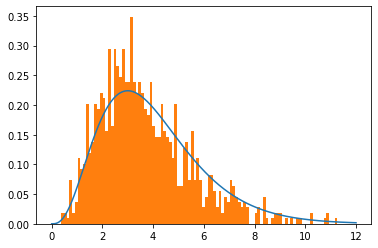

In [82]:
# サンプル数
N = 1000
#初期値
sample=0
samples=[]
for i in range(N):
    sample = sampling(sample)
    samples.append(sample)
plt.plot(x, p_data)
plt.hist(samples, bins=100,density=True)
plt.show()